In [11]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Simulate probability

In [59]:
llama = np.exp(np.load("../data/gen_probs_Llama-2-7b-hf.npy"))
gemma = np.exp(np.load("../data/gen_probs_gemma-7b.npy"))

In [60]:
print(np.std(llama))
print(np.std(gemma))

0.2597472771708943
0.19237153403500484


In [61]:
tab = []
for val in llama.reshape(-1):
    tab.append((val, "Llama"))
for val in gemma.reshape(-1):
    tab.append((val, "Gemma"))
tab = pd.DataFrame(tab)
tab.columns = ["Probability", "Model"]

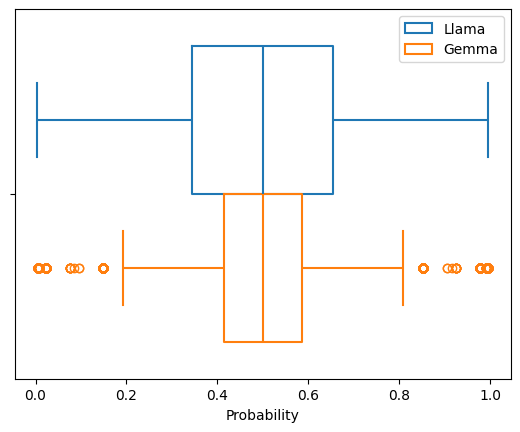

In [62]:
sns.boxplot(data=tab, x='Probability', hue='Model', fill=False)
plt.legend(loc='upper right')
plt.savefig("../figures/prob_75.pdf", bbox_inches="tight")
plt.show()

# Scenario 1

In [103]:
gemma_s1 = np.load("../data/scenario1_gemma-7b_90.npy")
llama_s1 = np.load("../data/scenario1_Llama-2-7b-hf_90.npy")

In [104]:
perf = gemma_s1.mean(1)
mean = perf[:, 1]
std = gemma_s1.std(1)[:, 1] / np.sqrt(100.0)

In [105]:
mean_l = llama_s1.mean(1)[:, 1]
std_l = llama_s1.std(1)[:, 1] / np.sqrt(100.0)

ValueError: x and y must have same first dimension, but have shapes (20,) and (17,)

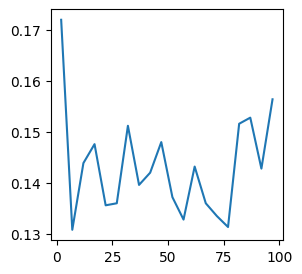

In [106]:
plt.figure(figsize=(3, 3))
plt.plot(perf[:, 0], perf[:, 1])
plt.plot(perf[:, 0], llama_s1.mean(1)[:, 1])
plt.axhline(y=0.1, color='black', linestyle='--')

plt.scatter(perf[:, 0], perf[:, 1])
plt.scatter(perf[:, 0], llama_s1.mean(1)[:, 1])

plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5)
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5)


plt.ylim([0, 0.7])

plt.title("Scenario 1 (p=0.9)")
plt.xlabel("Time (t)")
plt.ylabel("Expected prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Bayes risk'])

#plt.savefig("../figures/scenario1_p90.pdf", bbox_inches="tight")

plt.show()

# Scenario 1 - p=0.75

In [107]:
gemma_s1 = np.load("../data/scenario1_gemma-7b_75.npy")
llama_s1 = np.load("../data/scenario1_Llama-2-7b-hf_75.npy")

In [108]:
perf = gemma_s1.mean(1)
mean = perf[:, 1]
std = gemma_s1.std(1)[:, 1] / np.sqrt(100.0)

In [109]:
mean_l = llama_s1.mean(1)[:, 1]
std_l = llama_s1.std(1)[:, 1] / np.sqrt(100.0)

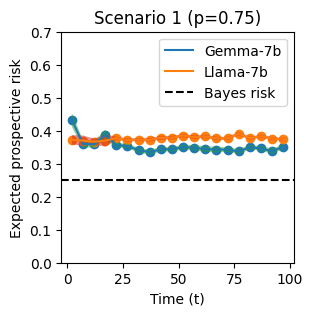

In [110]:
plt.figure(figsize=(3, 3))
plt.plot(perf[:, 0], perf[:, 1])
plt.plot(perf[:, 0], llama_s1.mean(1)[:, 1])
plt.axhline(y=0.25, color='black', linestyle='--')

plt.scatter(perf[:, 0], perf[:, 1])
plt.scatter(perf[:, 0], llama_s1.mean(1)[:, 1])


plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5)
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5)



plt.ylim([0, 0.7])

plt.title("Scenario 1 (p=0.75)")
plt.xlabel("Time (t)")
plt.ylabel("Expected prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Bayes risk'])

#plt.savefig("../figures/scenario1_p75.pdf", bbox_inches="tight")

plt.show()